In [5]:
# data preprocessing
import pandas as pd
import csv
from sklearn.utils import shuffle

# check if there is any duplicates

df = pd.read_csv('data 2.csv')
duplicates = df[df.duplicated(keep= False)]

if not duplicates.empty:
    print("Duplicated rows found:")
    print(duplicates)

df_cleaned = df.drop_duplicates()
print(f"Number of rows after removing duplicates: {len(df_cleaned)}")

# relabel the dataset 
df_cleaned['popularity'] = pd.qcut(df_cleaned['popularity'], q=4, labels=[0, 1, 2, 3])

# shuffle
# frac=1: chọn ngẫu nhiên tất cả các hàng- 100% 
df_shuffled = df_cleaned.sample(frac=1).reset_index(drop=True)

# export dataset into a new csv file
df_shuffled.to_csv("shuffled_dataset.csv", index=False)


Number of rows after removing duplicates: 170653


In [7]:
import pandas as pd
import csv
from sklearn.model_selection import train_test_split


data= pd.read_csv('shuffled_dataset.csv')
#train= train2+ val
#20% for test set
train, test= train_test_split(data, test_size= 0.2)
#use .head() to visualize in a table + an int as parameter

#train2 is the real training dataset that we use
#val is for validation
#10% for validation set
train2, val= train_test_split(train, test_size= 0.1)
train2.to_csv("FinalTrain_set.csv")
val.to_csv("FinalVal_set.csv")
test.to_csv("FinalTest_set.csv")

In [6]:
# picks top k features based on a scoring function
from sklearn.feature_selection import SelectKBest
# scoring function = ANOVA F-test to find the features most related to the target variable
from sklearn.feature_selection import f_classif
import pandas as pd

# Load data
data = pd.read_csv('shuffled_dataset.csv')

# Only choose numeric columns (not categorical)
X = data[['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness',
          'liveness', 'loudness', 'speechiness', 'tempo', 'explicit','key','mode']]
y = data['popularity']

# Apply SelectKBest
# create SelectKBest using f_classif 
# k: top k features most related to y
fvalue_Best = SelectKBest(f_classif, k= 5)
# fit: computes F score between each feature in X & target y
# transform: keep only top 3 scoring features 
X_kbest = fvalue_Best.fit_transform(X, y)

f_scores= fvalue_Best.scores_
# Get selected feature names by applying X.columns
# fvalue_Best.get_support(): return boolean mask indicating which features were selected by SelectKBest
feature_scores = list(zip(X.columns, f_scores))
sorted_features = sorted(feature_scores, key=lambda x: x[1], reverse=True)

# Print sorted F-scores
print("All features sorted by F-score:")
for feature, score in sorted_features:
    print(f"{feature}: {score:.4f}")


All features sorted by F-score:
year: 140889.9554
acousticness: 28613.2461
energy: 17824.7398
loudness: 14074.4366
instrumentalness: 5782.9568
speechiness: 3434.6854
explicit: 3295.0445
danceability: 2258.6676
tempo: 1103.8337
duration_ms: 432.6971
liveness: 355.4197
valence: 311.8713
mode: 142.4507
key: 10.8784


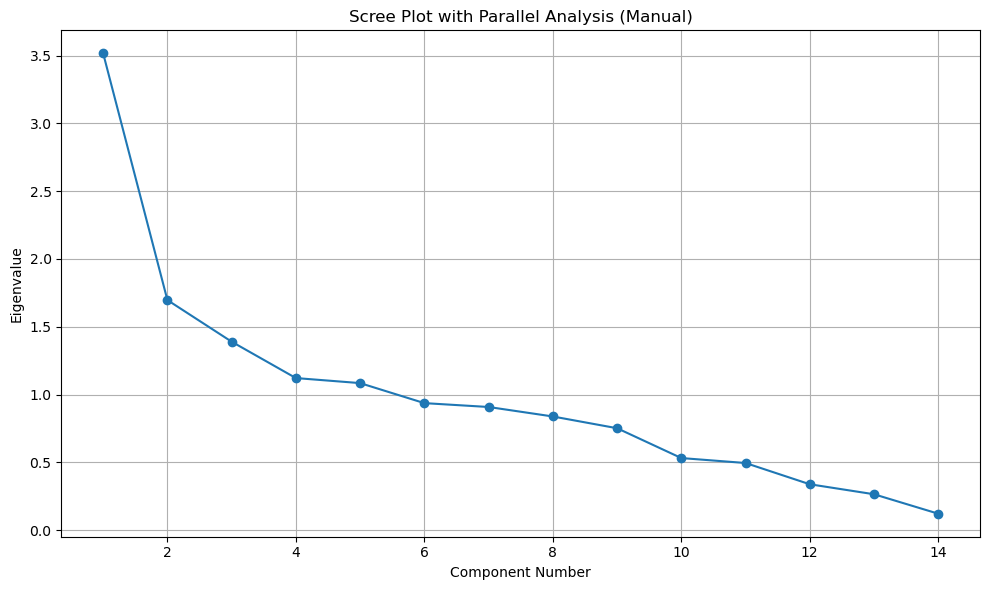

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('shuffled_dataset.csv')
X = data[['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness',
          'liveness', 'loudness', 'speechiness', 'tempo', 'explicit', 'key', 'mode']]

# shapet pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('shuffled_dataset.csv')
X = data[['year', 'acousticness', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'explicit',
          'danceability', 'tempo', 'duration_ms', 'liveness', 'valence', 'mode', 'key']]

# shape= number of elements in each dimension
n_samples, n_features = X.shape
y = data['popularity']

scaler = StandardScaler()
# scale for better performance (standardization)
X_scaled = scaler.fit_transform(X)


pca = PCA()
pca.fit(X_scaled)
# get eigenvalues of principal components (larger eigenvalues -> component captures more of the dataset’s variability)
real_eigenvalues = pca.explained_variance_


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_features+1), real_eigenvalues, marker='o')
plt.title('Scree Plot with Parallel Analysis (Manual)')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.tight_layout()
plt.show()

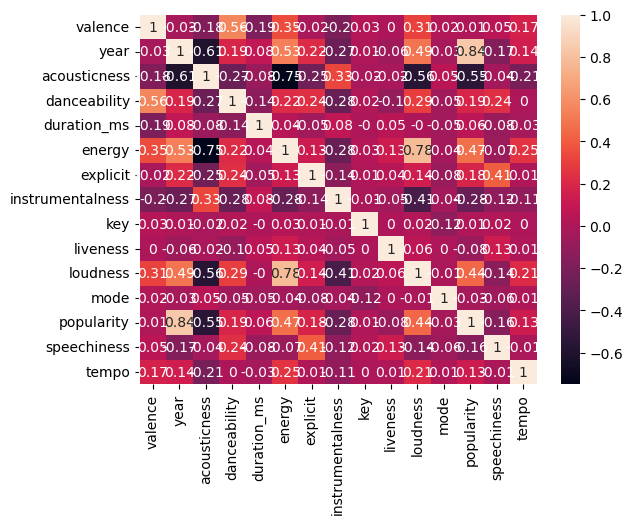

<Figure size 10000x10000 with 0 Axes>

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data= pd.read_csv('shuffled_dataset.csv')
#only choose numeric columns (not categorial)
numeric_cols= data.select_dtypes(include=['number'])

correlation= numeric_cols.corr().round(2)
sns.heatmap(correlation, annot = True)
plt.figure(figsize=(100,100))  # Phóng to kích thước hình ảnh 
plt.show()


In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import math


# Load training data
training = pd.read_csv("FinalTrain_set.csv", usecols=['name', 'popularity', 'energy', 'loudness', 'year','acousticness','instrumentalness'])
training_array = training[['energy', 'loudness', 'year','acousticness','instrumentalness']].to_numpy()
category_array = training['popularity'].to_numpy()


#Load validating data
validating= pd.read_csv("FinalVal_set.csv", usecols= ['name', 'popularity', 'energy', 'loudness', 'year','acousticness','instrumentalness'])
validating_array= validating[['energy', 'loudness', 'year','acousticness','instrumentalness']].to_numpy()
valcat_array= validating['popularity'].to_numpy()

def minkowski_distance(x, y, p= 5):
    sum=0
    for i in range(len(x)):
        sum += abs(x[i] - y[i])**p
    return sum ** (1 / p)

# K-Nearest Neighbors (KNN) function
# point: STT của observation trong validateSet
# k: k nearest neighbors

def KNN (trainSet, trainLabels, validateSet, point, k):
    distances = []

    # Calculate distances between the point and all training data
    for i in range(len(trainSet)):
        dist = minkowski_distance(trainSet[i], validateSet[point])
        #add distances to the list
        distances.append((dist, i, trainLabels[i]))

    # Sort distances in descending order and select top k
    distances.sort()
    top_k_distances = distances[:k] 


    # Display the song details 
    val_row= validating.iloc[point]
    print(f"The selected song: {val_row['name']}- Year: {val_row['year']}, Energy: {val_row['energy']}, "
    f"Loudness: {val_row['loudness']}, Acousticness: {val_row['acousticness']}, Instrumentalness: {val_row['instrumentalness']}, Popularity score: {val_row['popularity']}")
    
    print(f"First {k} neighbors: ")
    for i, (dist, idx, _) in enumerate(top_k_distances):
        row = training.iloc[idx]  # Get song details from DataFrame
        print(f"{i}. {row['name']}- Year: {row['year']}, Energy: {row['energy']}, "
        f"Loudness: {row['loudness']}, Acousticness: {row['acousticness']}, Instrumentalness: {row['instrumentalness']}, Popularity score: {row['popularity']}, Distance: {dist}")

    weights_count = {0: 0, 1: 0, 2: 0, 3: 0}
    weights_sum = {0: 0, 1: 0, 2: 0, 3: 0}
    weights_average= {0: 0, 1: 0, 2: 0, 3: 0}

    for dist, _,  category in top_k_distances:
        if dist==0:
            weight= float('inf') # no authority in voting
        else:
            weight= 1/dist
        weights_sum[category] += weight
        weights_count[category] += 1

    for key in weights_average:
        if weights_count[key] != 0:
            weights_average[key]= weights_sum[key]/weights_count[key]
      
    print(f"Predicted popularity: {max (weights_average, key= weights_average.get)}")


#Scale the features for better performance
scaler= StandardScaler()
training_array_scaled= scaler.fit_transform(training_array)
validating_array_scaled= scaler.transform(validating_array)

KNN(training_array_scaled, category_array, validating_array_scaled, 200, 100)

The selected song: Mi Gente- Year: 1975, Energy: 0.8740000000000001, Loudness: -3.4130000000000003, Acousticness: 0.368, Instrumentalness: 1.66e-05, Popularity score: 3
First 100 neighbors: 
0. Cantemos- Year: 1973, Energy: 0.856, Loudness: -3.711, Acousticness: 0.361, Instrumentalness: 7.31e-05, Popularity score: 1, Distance: 0.08525964335867313
1. Cantemos- Year: 1973, Energy: 0.8540000000000001, Loudness: -3.729, Acousticness: 0.369, Instrumentalness: 4.64e-05, Popularity score: 2, Distance: 0.08903087438258121
2. Arbolito- Year: 1973, Energy: 0.8590000000000001, Loudness: -3.765, Acousticness: 0.332, Instrumentalness: 0.0, Popularity score: 1, Distance: 0.10412509826924754
3. Beast Of Burden - Remastered- Year: 1978, Energy: 0.878, Loudness: -3.864, Acousticness: 0.39, Instrumentalness: 0.000778, Popularity score: 2, Distance: 0.11966867608579886
4. The Fire Down Below- Year: 1976, Energy: 0.843, Loudness: -2.83, Acousticness: 0.391, Instrumentalness: 0.0, Popularity score: 3, Dist

In [2]:
import pandas as pd
training = pd.read_csv("FinalTrain_set.csv")
print(training['popularity'].value_counts())


popularity
2    31573
0    30967
1    30579
3    29750
Name: count, dtype: int64


In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import math
# Load training data
training = pd.read_csv("FinalTrain_set.csv", usecols=['name', 'popularity', 'energy', 'loudness', 'year','acousticness','instrumentalness'])
training_array = training[['energy', 'loudness', 'year','acousticness','instrumentalness']].to_numpy()
category_array = training['popularity'].to_numpy()

#Load validating data
validating= pd.read_csv("FinalVal_set.csv", usecols= ['name', 'popularity', 'energy', 'loudness', 'year','acousticness','instrumentalness'])
validating_array= validating[['energy', 'loudness', 'year','acousticness','instrumentalness']].to_numpy()
valcat_array = validating['popularity'].to_numpy()

#Load testing data
testing= pd.read_csv("FinalTest_set.csv", usecols= ['name', 'popularity', 'energy', 'loudness', 'year','acousticness','instrumentalness'])
test_array= testing[['energy', 'loudness', 'year','acousticness','instrumentalness']].to_numpy()
testcat_array= testing['popularity'].to_numpy()

#Scale the features for better performance
scaler= StandardScaler()
training_array_scaled= scaler.fit_transform(training_array)
validating_array_scaled= scaler.transform(validating_array)
test_array_scaled= scaler.transform(test_array)


knn= KNeighborsClassifier(n_neighbors= 100, weights= 'distance')
knn.fit(training_array_scaled, category_array)

validate_pred= knn.predict(validating_array_scaled)
test_pred = knn.predict(test_array_scaled)


print("Accuracy score of the validating set: ", accuracy_score(valcat_array, validate_pred))
print("Accuracy score of the testing set: ", accuracy_score(testcat_array, test_pred))


Accuracy score of the validating set:  0.6859298322712957
Accuracy score of the testing set:  0.6875860654536932


In [12]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load training data
training = pd.read_csv("FinalTrain_set.csv", usecols=['name', 'popularity', 'year', 'energy', 'acousticness', 'instrumentalness', 'loudness'])
training_array = training[['year', 'energy', 'acousticness', 'instrumentalness', 'loudness']].to_numpy()
category_array = training['popularity'].to_numpy()


#Load validating data
validating= pd.read_csv("FinalVal_set.csv", usecols= ['name', 'popularity', 'year', 'energy', 'acousticness','instrumentalness','loudness'])
validating_array= validating[['year', 'energy', 'acousticness', 'instrumentalness', 'loudness']].to_numpy()
valcat_array= validating['popularity'].to_numpy()

#Load testing data
testing= pd.read_csv("FinalTest_set.csv", usecols= ['name', 'popularity', 'year', 'energy', 'acousticness','instrumentalness', 'loudness'])
test_array= testing[['year', 'energy', 'acousticness', 'instrumentalness', 'loudness']].to_numpy()
testcat_array= testing['popularity'].to_numpy()


# Scale the features for better performance
scaler= StandardScaler()
training_array_scaled= scaler.fit_transform(training_array)
validating_array_scaled= scaler.transform(validating_array)
testing_array_scaled= scaler.transform(test_array)

knn= KNeighborsClassifier(n_neighbors= 100, weights= 'distance', metric= 'cityblock')
knn.fit(training_array_scaled, category_array)

val_pred= knn.predict(validating_array_scaled)
test_pred= knn.predict(testing_array_scaled)

    
print("Accuracy score of the validating set: ", accuracy_score(valcat_array, val_pred))
print("Accuracy score of the testing set: ", accuracy_score(testcat_array, test_pred))

Accuracy score of the validating set:  0.6871749798579067
Accuracy score of the testing set:  0.6892268026134599


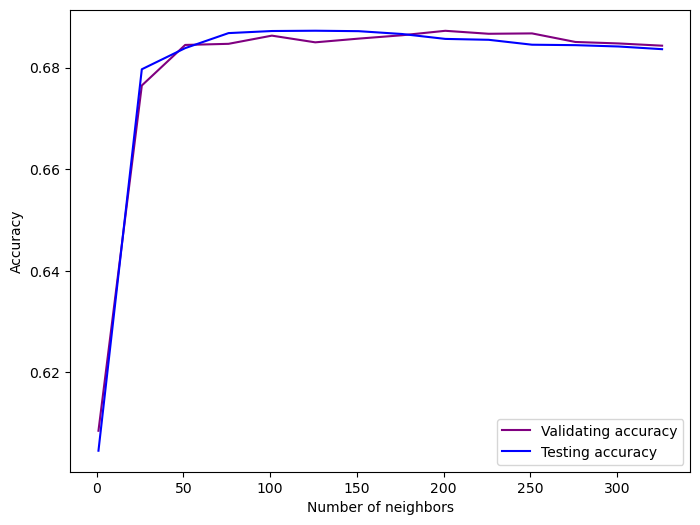

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


# Load training data
training = pd.read_csv("FinalTrain_set.csv", usecols=['name', 'popularity', 'energy', 'loudness', 'year','acousticness','instrumentalness'])
training_array = training[['energy', 'loudness', 'year','acousticness','instrumentalness']].to_numpy()
category_array = training['popularity'].to_numpy()

#Load validating data
validating= pd.read_csv("FinalVal_set.csv", usecols= ['name', 'popularity', 'energy', 'loudness', 'year','acousticness','instrumentalness'])
validating_array= validating[['energy', 'loudness', 'year','acousticness','instrumentalness']].to_numpy()
valcat_array = validating['popularity'].to_numpy()

#Load testing data
testing= pd.read_csv("FinalTest_set.csv", usecols= ['name', 'popularity', 'energy', 'loudness', 'year','acousticness','instrumentalness'])
test_array= testing[['energy', 'loudness', 'year','acousticness','instrumentalness']].to_numpy()
testcat_array= testing['popularity'].to_numpy()

#Scale the features for better performance
scaler= StandardScaler()
training_array_scaled= scaler.fit_transform(training_array)
validating_array_scaled= scaler.transform(validating_array)
test_array_scaled= scaler.transform(test_array)

val_acc= []
test_acc= []
k = np.arange(1,351,25)

for i in k:
    knn= KNeighborsClassifier(n_neighbors= i, weights= 'distance')
    knn.fit(training_array_scaled, category_array)
    validate_pred= knn.predict(validating_array_scaled)
    test_pred = knn.predict(test_array_scaled)
    val_acc.append(accuracy_score(valcat_array, validate_pred))
    test_acc.append(accuracy_score(testcat_array, test_pred))

plt.figure(figsize=(8, 6))
plt.plot(k, val_acc, color='purple',label= "Validating accuracy")
plt.plot(k, test_acc, color= 'blue', label= "Testing accuracy")
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

    